In [1]:
import pandas as pd
import statistics

In [9]:
df = pd.read_csv('jolteon-samples.csv')
df

,dram,core,pkg,dram.1,core.1,pkg.1,timestamp
0,3766.3483,0.0,116639.7908,24933.4645,0.0,138380.4521,1614126910211940
1,3766.3483,0.0,116639.7908,24933.4645,0.0,138380.4521,1614126910211971
2,3766.3483,0.0,116639.7908,24933.4645,0.0,138380.4521,1614126910211998
3,3766.3483,0.0,116639.7908,24933.4645,0.0,138380.4521,1614126910212023
4,3766.3483,0.0,116639.7908,24933.4645,0.0,138380.4521,1614126910212049
...,...,...,...,...,...,...,...
2372378,3879.5822,0.0,117718.1492,25130.9673,0.0,139841.3978,1614126970462119
2372379,3879.5822,0.0,117718.1492,25130.9673,0.0,139841.3978,1614126970462140
2372380,3879.5822,0.0,117718.1492,25130.9673,0.0,139841.3978,1614126970462162
2372381,3879.5822,0.0,117718.1492,25130.9673,0.0,139841.3978,1614126970462183


In [10]:
header = list(df.head())
del header[-1] # remove timestamp
header

['dram', 'core', 'pkg', 'dram.1', 'core.1', 'pkg.1']

In [11]:
timestamps = df['timestamp']
# list(timestamps)

In [24]:
def diff_list(l): # durations as opposed to cumulative raw timestamps
    dl = list()
    prev = l[0]
    for item in l[1:]:
        dl.append(item-prev)
        prev = item
    return dl
    
#for item in header:
#    print(df[item])

drams = df['dram']
lastDifferent = drams[0]
ts_diffs = [ timestamps[0] ] # timestamps where there was an energy update
for i in range(len(drams)):
    if drams[i] != lastDifferent:
        ts_diffs.append(timestamps[i])
        lastDifferent = drams[i]

ts_diffs = diff_list(ts_diffs) # get durations instead of raw timestamps
results_df = pd.DataFrame(ts_diffs,columns=['update rate'])


<AxesSubplot:>

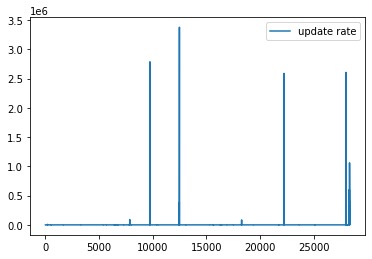

In [27]:
# results_df.describe()
results_df.plot()

# sorted(ts_diffs)

,update rate no outliers
count,28315.000000
mean,1100.835811
std,2530.099903
min,74.000000
25%,974.000000
50%,1000.000000
75%,1035.000000
max,112392.000000


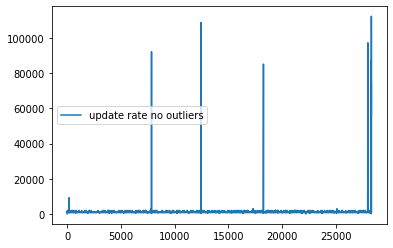

In [28]:
# this is the part where I remove outliers

sd = statistics.stdev(ts_diffs)
avg = statistics.mean(ts_diffs)

filtered = list(); outliers = list()

for tsd in ts_diffs:
    if (tsd > avg + 3*sd) or (tsd < avg - 3*sd):
        outliers.append(tsd)
    else:
        filtered.append(tsd)
        
#print(outliers)
#print(filtered)
result_df_noOutliers = pd.DataFrame(filtered,columns=['update rate no outliers'])
result_df_noOutliers.plot()
result_df_noOutliers.describe()


In [7]:
with open('test.tex','w') as fh:
    fh.write(result_df_noOutliers.describe().to_latex())
